### Задание №1: Загрузите и осмотрите данные.
    

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import random
import os
import regex as re
import warnings

import sklearn
#import tensorflow as tf

pd.options.display.max_columns = 100
pd.options.display.max_rows =  200
pd.options.display.max_info_rows = 1690785
pd.options.display.max_info_columns = 200
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.date_dayfirst = True
pd.options.mode.chained_assignment = None

from google.colab import drive, files
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.DataFrame()

file_names = [file_name for file_name in os.listdir(path) if 'Fraud_train_data' in file_name]
for file_name in file_names:
  df = pd.concat([df, pd.read_csv(os.path.join(path, file_name), sep=';')])


df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,city_state,is_fraud
0,2019-06-02 10:02:29,4561546772499,fraud_Heidenreich PLC,grocery_pos,124.09,Daniel,Briggs,M,7118 Jessica Unions Apt. 789,87035,34.99,-106.06,7268,"Therapist, art",1988-08-04,a0b37b69970dc4e638b21595983cd8c0,1338631349,34.26,-105.11,Moriarty_NM,0
1,2019-08-05 19:22:25,3563837241599446,fraud_Daugherty LLC,kids_pets,54.09,Timothy,Simmons,M,1049 John Ports Suite 057,97132,45.31,-122.97,28278,Research scientist (physical sciences),1977-07-17,0f0b9b6670679d27265d341a8479fc14,1344194545,45.16,-122.37,Newberg_OR,0
2,2019-11-17 01:07:35,30501624614310,fraud_Kuvalis Ltd,gas_transport,66.18,Amanda,Smith,F,180 Graves Shore,29939,32.68,-81.25,302,Magazine features editor,1973-05-04,9c5ec5cc25429a61a613f6434746d5de,1353114455,32.12,-80.32,Scotia_SC,0
3,2019-03-20 18:08:51,4951647200979051,fraud_Donnelly LLC,entertainment,32.16,Kimberly,Miller,F,75533 Tamara Valleys,62856,37.99,-88.94,324,"Scientist, research (physical sciences)",1976-06-15,c7c7d7de62f46ae18072af147a9ae819,1332266931,38.57,-88.80,Logan_IL,0
4,2019-08-30 10:50:54,3589289942931264,"fraud_Morissette, Weber and Wiegand",grocery_net,32.47,Paula,Estrada,F,350 Stacy Glens,57374,43.76,-97.59,343,"Development worker, international aid",1972-03-05,196b89aeac06e137f374b9736ce1ffa4,1346323854,44.17,-98.18,Spencer_SD,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216262,2020-06-21 01:00:08,3524574586339330,fraud_Kassulke PLC,shopping_net,977.01,Ashley,Cabrera,F,94225 Smith Springs Apt. 617,32960,27.63,-80.40,105638,"Librarian, public",1986-05-07,a83b093f0c1d9068fa0089f7c722615f,1371776408,26.89,-80.83,Vero Beach_FL,1
216263,2020-06-21 01:53:35,3524574586339330,fraud_Schumm PLC,shopping_net,"1,210.91",Ashley,Cabrera,F,94225 Smith Springs Apt. 617,32960,27.63,-80.40,105638,"Librarian, public",1986-05-07,f75b35bed13b9e692f170dba45a15b21,1371779615,28.22,-79.86,Vero Beach_FL,1
216264,2020-06-21 02:16:56,4005676619255478,"fraud_Tillman, Dickinson and Labadie",gas_transport,10.24,William,Perry,M,458 Phillips Island Apt. 768,70726,30.46,-90.90,71335,Herbalist,1994-05-31,a0ba2472cd3fc9731f2a18d3f308f5c3,1371781016,29.70,-91.36,Denham Springs_LA,1
216265,2020-06-21 03:26:20,3560725013359375,fraud_Corwin-Collins,gas_transport,21.69,Brooke,Smith,F,63542 Luna Brook Apt. 012,79759,31.86,-102.74,23,Cytogeneticist,1969-09-15,daa281350b1e16093c7b4bf97bf4d6ed,1371785180,32.68,-103.48,Notrees_TX,1


Уберем переменные, которые нам явно не понадобятся.

In [ ]:
df = df.drop(['cc_num', 'street', 'trans_num', 'unix_time', 'first', 'last'], axis=1)

Посмотрим на пропуски.

In [ ]:
df.isna().sum()

trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
gender                   0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
merch_lat                0
merch_long               0
city_state               0
is_fraud                 0
dtype: int64

Посмотрим на частоту классов.

In [ ]:
df['is_fraud'].value_counts()

0    458761
1      7506
Name: is_fraud, dtype: int64

Классы не сбалансированы. Это можно исправить с помощью балансирующего флага:

```
p = 1 - (df['is_fraud'] == 1).sum() / (df['is_fraud'] == 0).sum()

df.loc[df['is_fraud'] == 0, 'balance_flag'] = np.random.choice([0,1], size=(df['is_fraud'] == 0).sum(), p=[p, 1-p])
df.loc[df['is_fraud'] == 1, 'balance_flag'] = 1
```

Так, классы будут сбалансированы если отобрать строки по balance_flag == 1. Я не буду применять флаг, так как я хочу сравнить мою модель с той, которая была сделана группой на семинаре. Если и применять флаг, то это нужно делать в конце обработки данных, так как в удаленных строках может содержаться важная информация - например, для mean encoding'а.

Предобработаем данные, начав с осмотра типов данных.

In [ ]:
df.dtypes

trans_date_trans_time     object
merchant                  object
category                  object
amt                      float64
gender                    object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
merch_lat                float64
merch_long               float64
city_state                object
is_fraud                   int64
dtype: object

In [ ]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')
df = df.rename({'trans_date_trans_time' : 'dt'}, axis=1)
df['dt']

0        2019-06-02 10:02:29
1        2019-08-05 19:22:25
2        2019-11-17 01:07:35
3        2019-03-20 18:08:51
4        2019-08-30 10:50:54
                 ...        
216262   2020-06-21 01:00:08
216263   2020-06-21 01:53:35
216264   2020-06-21 02:16:56
216265   2020-06-21 03:26:20
216266   2020-06-21 03:59:46
Name: dt, Length: 466267, dtype: datetime64[ns]

При осмотре переменных типа `object` важно посмотреть, нет ли в них странных значений или placeholder'ов пропусков, вроде `*n.a.*`. Если уникальных значений слишком много, сортировка и вывод первых и последних значений часто помогает.

In [ ]:
uniques = np.sort(df['merchant'].unique())
uniques[0], uniques[-1]

('fraud_Abbott-Rogahn', 'fraud_Zulauf LLC')

In [ ]:
#проверим, содержат ли все значения из merchant подстроку fraud_
df['merchant'].apply(lambda x: 'fraud_' in x).all()

True

Все значения из `merchant` содержат эту подстроку, поэтому мы ее уберем.

In [ ]:
df['merchant'] = df['merchant'].str.replace('fraud_', '')

Дальнейшая обработка данных:

In [ ]:
df['gender'] = np.where(df['gender'] == 'M', 1, 0)

df['dob'] = pd.to_datetime(df['dob'], format='%Y-%m-%d')
df['age'] = 2024 - df['dob'].dt.year
df = df.drop('dob', axis=1)

df[['city', 'state']] = df['city_state'].str.split('_', expand=True)
df = df.drop('city_state', axis=1)

In [ ]:
df.head()

,dt,merchant,category,amt,gender,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,age,city,state
0,2019-06-02 10:02:29,Heidenreich PLC,grocery_pos,124.09,1,87035,34.99,-106.06,7268,"Therapist, art",34.26,-105.11,0,36,Moriarty,NM
1,2019-08-05 19:22:25,Daugherty LLC,kids_pets,54.09,1,97132,45.31,-122.97,28278,Research scientist (physical sciences),45.16,-122.37,0,47,Newberg,OR
2,2019-11-17 01:07:35,Kuvalis Ltd,gas_transport,66.18,0,29939,32.68,-81.25,302,Magazine features editor,32.12,-80.32,0,51,Scotia,SC
3,2019-03-20 18:08:51,Donnelly LLC,entertainment,32.16,0,62856,37.99,-88.94,324,"Scientist, research (physical sciences)",38.57,-88.80,0,48,Logan,IL
4,2019-08-30 10:50:54,"Morissette, Weber and Wiegand",grocery_net,32.47,0,57374,43.76,-97.59,343,"Development worker, international aid",44.17,-98.18,0,52,Spencer,SD


### Задание №2: Оцените распределение всех числовых признаков и корреляцию между ними.

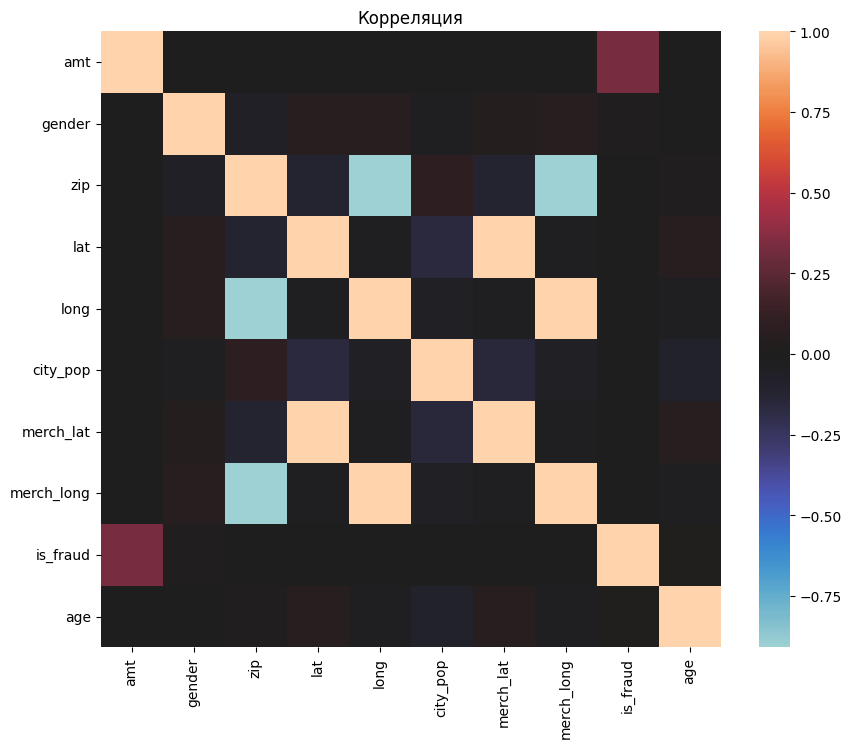

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), center=0)
plt.title('Корреляция');

Удалим некоторые переменные, чтобы убрать сильную корреляцию.

In [ ]:
df = df.drop(['merch_long', 'merch_lat', 'zip'], axis=1)

Построим гистограммы числовых переменных.

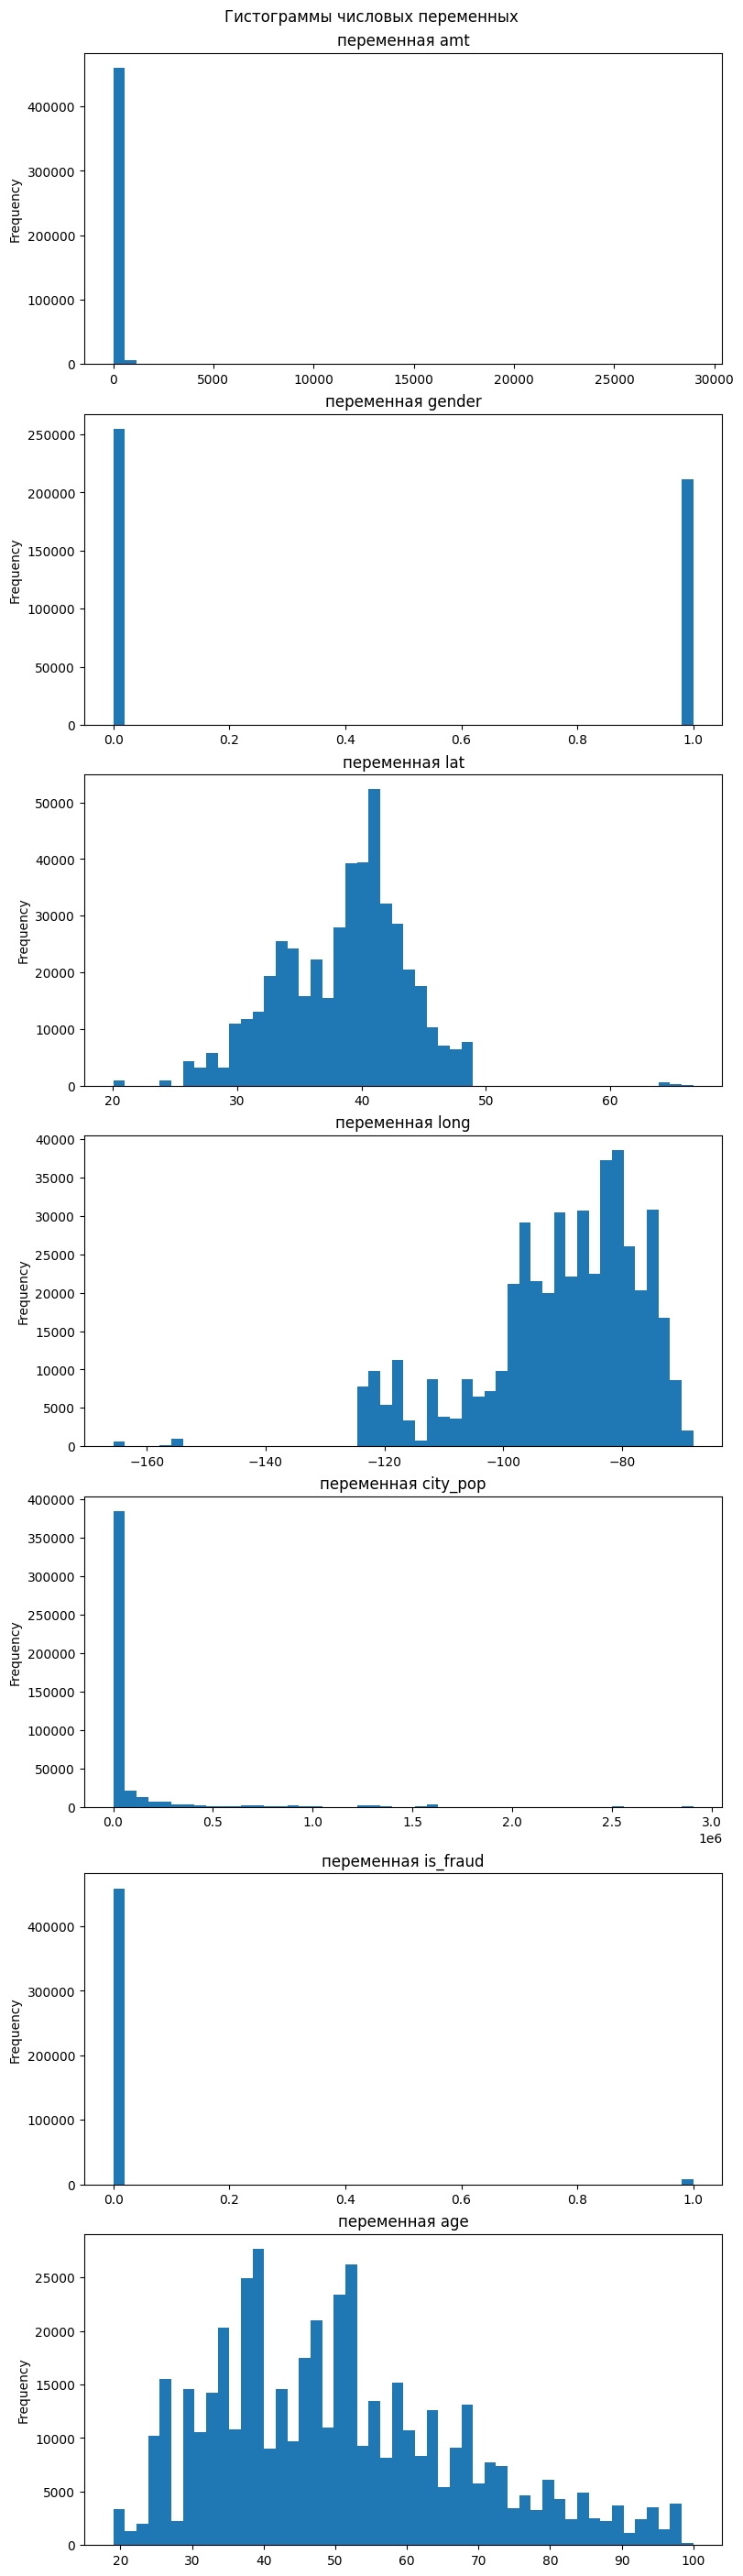

In [ ]:
out = df.select_dtypes(include='number')

fig, axs = plt.subplots(len(out.columns), 1, figsize=(8, 4*len(out.columns)), layout='constrained')

for i, col in enumerate(out.columns):
  df[col].plot(kind='hist', ax=axs[i], bins=50)
  axs[i].set_title(f'переменная {col}')

plt.suptitle('Гистограммы числовых переменных');

### Задание №3: Определите количество выбросов в датасете для всех числовых атрибутов и ответьте на вопрос - целесообразно ли удалять аномалии из датасета для более качественного обучения?

Аномалии я определил вручную, а не с помощью, напрмер, правила трех сигм, потому что три сигмы могут давать неудовлетворительные результаты, если распределение переменных необычное. Здесь я могу использовать ручной отбор, так как переменных немного.

In [ ]:
outl_criteria = {
    'amt' : {'right' : 5000},
    'lat' : {'left' : 23, 'right' : 60},
    'long' : {'left' : -150},
    'city_pop' : {'right' : 2e6}
}

df['is_outl'] = 0

for col, criteria in outl_criteria.items():
  for direction, threshold in criteria.items():
    row_indexer = df[col] < threshold if direction == 'left' else df[col] > threshold
    df.loc[row_indexer, 'is_outl'] = 1


df['is_outl'].value_counts()

0    462077
1      4190
Name: is_outl, dtype: int64

In [ ]:
df.groupby(['is_outl', 'is_fraud']).size().unstack(1)

is_fraud,0,1
is_outl,,
0,454672,7405
1,4089,101


Выше - таблица сопряженности переменных фрода и аномалий.

Если бы мы увидели, что удаление аномалий приведет к большой потере наблюдений с фродом, то мы бы не стали их удалять. Однако, как мы видим, удаление аномалий приведет к потере 101 наблюдения с фродом, что не так много.

In [ ]:
df = df[df['is_outl'] == 0]
df['is_outl'].value_counts()

0    462077
Name: is_outl, dtype: int64

In [ ]:
df = df.drop('is_outl', axis=1)

### Задание №4: Наша задача - построить модель, которая позволит по набору данных определять, является ли операция с кредитной картой мошеннической или нет. Для этого необходимо погрузиться в датасет. Проведите исследовательский анализ данных (EDA)
    
    
1. Оценить распределение меток фрода в общем
2. Оценить, в каких точках больше всего фрода и есть ли такие точки
3. Оценить, кто больше подвержен фроду - мужчины или женщины
4. Оценить, в каком штате чаще всего совершаются фродовые операции
5. В каких городах больше всего фрода
6. Какие должности подвержены фроду?
7. Оцените временные периоды, когда совершается больше всего фрода

Общее распределение

<Axes: >

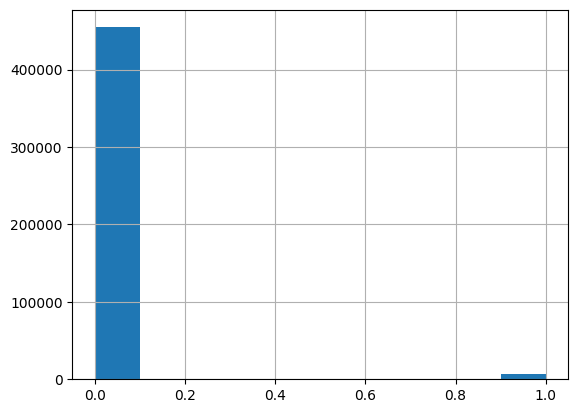

In [ ]:
df['is_fraud'].hist()

Географическое распределение

In [ ]:
import geopandas as gpd

states = gpd.read_file(states_file_path)

#only leave non continental states
states = states[~states['STUSPS'].isin(['HI','VI','MP','GU','AK','AS','PR'])]
states.shape

(49, 15)

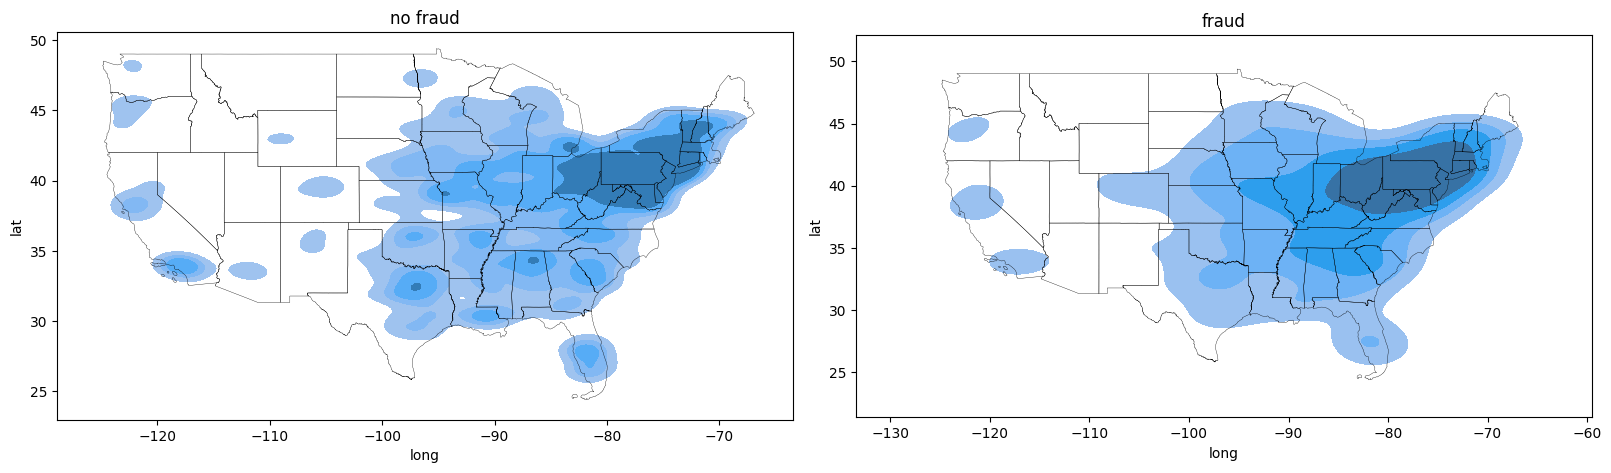

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16,8), layout='constrained')

for index, unique in enumerate(df['is_fraud'].unique()):
  states.boundary.plot(linewidth=0.25, color='black', ax=axs[index])
  sns.kdeplot(df[df['is_fraud'] == unique], x='long', y='lat', levels=5, thresh=.2, fill=True, ax=axs[index])
  _title = 'fraud' if unique else 'no fraud'
  axs[index].set_title(_title)

Мошеннические транзакции распределены более равномерно в сравнении с общими данными. Нельзя выделить какие-то регионы, где мошеннические транзакции чаще проходят.

Распределение по гендеру

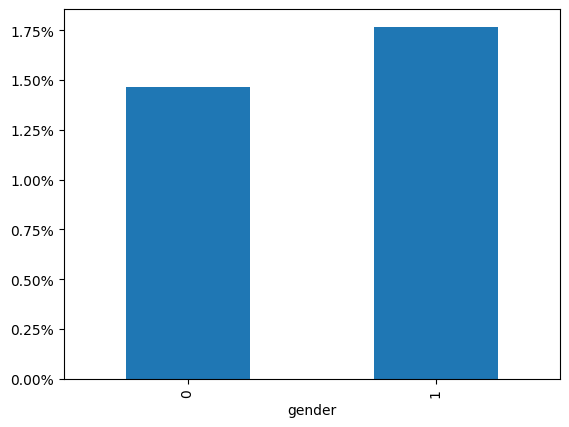

In [ ]:
ax = df.groupby('gender')['is_fraud'].mean().plot(kind='bar')
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:.2%}'))

Мужчины чуть чаще совершают мошеннические транзакции.

Распределение по штатам

In [ ]:
df.groupby('state')['is_fraud'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)[::5].style.format({'mean' : '{:.2%}'})

,mean,count
state,,
DE,100.00%,9
OR,2.20%,6766
KS,1.89%,8265
MN,1.81%,11418
WY,1.60%,6856
CA,1.57%,20155
MS,1.51%,7620
AR,1.44%,11182
MO,1.37%,13931


Смотря на таблицу, можно было бы сказать, что мошеннические транзакции чаще проходят в Делавере. Однако, если посмотреть на частоту, можно понять, что у Делавера недостаточно транзакций, чтобы сделать какой-нибудь существенный вывод.

То же самое верно и для городов или профессий.

Распределение по городам

In [ ]:
df.groupby('city')['is_fraud'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)[::40].style.format({'mean' : '{:.2%}'})

,mean,count
city,,
Chattanooga,100.00%,7
Freeport,100.00%,9
Du Pont,6.77%,192
Hopewell,5.32%,188
Tuscarora,4.26%,188
Stittville,3.47%,173
University,2.89%,553
Fullerton,2.58%,542
Eldridge,2.31%,563


Распределение по профессиям

In [ ]:
df.groupby('job')['is_fraud'].agg(['mean', 'size']).sort_values(by='mean', ascending=False)[::40]

,mean,size
job,,
Ship broker,1.00,7
Purchasing manager,0.05,188
Politician's assistant,0.03,794
Outdoor activities/education manager,0.03,367
Mechanical engineer,0.02,2024
Broadcast presenter,0.02,1305
Location manager,0.02,499
Occupational hygienist,0.02,1099
Radio producer,0.01,1647


### Задание №5: Преобразуйте данные для эффективного обучения ML моделей, заменив категориальные переменные числовыми

OheHotEncoding для переменных города, штата и профессии не подойдет из-за большого количества групп. Вместо этого, мы применим mean encoding. Чтобы адекватно его применить, нужно идентифицировать группы с слишком малой частотой и дать им средний эффект (то есть доля мошеннических транзакций) по всему датафрейму.

Я использую свой метод, который считает 'достоверность' эффекта исходя из абсолютной и относительной частоты группы. Если частота группы мала, ее эффект линейно интерполируется с медианным эффектом по всему датафрейму.

####Mean Encoder

In [ ]:
class MeanEncoder():
  '''
  A mean encoder that discounts the effect of categorical variable with low observed frequency (pulls it towards overall median)

  Usage:
  enc = MeanEncoder()
  df['encoded column'] = enc.fit(df['original column'], df['target column'])
  df_2['encoded column'] = enc.transform(df_2['original column']) # use previously fitted encoder to transform another column - must have same categories, although unencountered ones are filled with the median
  '''

  def __init__(self):
    self.transform_dict = None
    self.transform_median = None

    self.transform_name = None
    self.target_name = None


  def __str__(self):
    if self.transform_dict is None:
      cont = 'Unfit'
    else:
      cont = f'Fit for variable \'{self.transform_name}\' based on target variable \'{self.target_name}\', number of groups {len(self.transform_dict)} with median {self.transform_median:.4f}'
    return f'Mean encoder. ' + cont


  def fit(self, transform, target):
    '''
    Returns a transformed Pandas series, logs in a group to value dict (transform_dict) for future use at transform()
    '''
    out = pd.concat([transform, target], axis=1).groupby(transform.name, dropna=False).agg({target.name : ['count', 'mean']})
    out.columns = out.columns.droplevel(0)

    out['power loss'] = self.compute_loss(out)

    out.loc[out['power loss'] >= 1, 'corrected ratio'] = out['mean'].median()
    out.loc[out['power loss'] <= 0, 'corrected ratio'] = out['mean']
    out.loc[(out['power loss'] > 0) & (out['power loss'] < 1), 'corrected ratio'] = out['power loss'] * out['mean'].median() + (1 - out['power loss']) * out['mean']

    self.transform_dict = out['corrected ratio'].to_dict()
    self.transform_median = out['corrected ratio'].median()
    self.transform_name = transform.name
    self.target_name = target.name

    return transform.replace(self.transform_dict)


  def compute_loss(self, grouped_table):
    '''
    Returns series with categorical variable as index and distrust factor (loss) as value. For internal use
    '''
    out = grouped_table

    # relative loss
    out['power loss relative'] = 1.36 - 1.81 * out['count'] / out['count'].mean()
    out['power loss relative'] = np.clip(out['power loss relative'], 0, 1)

    # absolute loss
    out['power loss absolute'] = -1/200 * (out['count'] - 100) / ((1/0.75 - 2) * (1 - (out['count'] - 100) / 200) + 1) + 1
    out['power loss absolute'] = np.clip(out['power loss absolute'], 0, 1)

    out['power loss'] = out[['power loss relative', 'power loss absolute']].min(axis=1)
    return out['power loss']


  def transform(self, to_transform):
    '''
    Use a previously obtained group to value dict to transform another column.
    '''
    valid_boolsrs = to_transform.isin(self.transform_dict.keys())
    to_transform[valid_boolsrs] = to_transform[valid_boolsrs].replace(self.transform_dict)
    to_transform[~valid_boolsrs] = self.transform_median
    to_transform = to_transform.fillna(self.transform_median)
    return to_transform

####Использование енкодера

Прежде чем использовать енкодер на 'job' нужно подправить данные.

Я:
* убрал все что в скобках
* убрал все что после запятой
* убрал лишние пробелы
* в строках, содержащих слэш, оставил все после слэша

In [ ]:
df['job'] = df['job'].str.lower()\
  .str.replace(r'\([^)]*\)','', regex=True)\
  .str.replace('\'', '')\
  .str.replace('\"', '')\
  .str.replace(r',(.*)', '', regex=True)\
  .str.replace(r'\s+', ' ', regex=True)\
  .str.replace(r'^\s', '', regex=True)\
  .str.replace(r'\s$', '', regex=True)


df.loc[df['job'].str.contains('/'), 'job'] = df.loc[df['job'].str.contains('/'), 'job'].str.match(r'/(.*)', '/1')
df['job'].unique()[:20]

array(['therapist', 'research scientist', 'magazine features editor',
       'scientist', 'development worker', 'heritage manager',
       'travel agency manager', False, 'science writer', 'web designer',
       'cytogeneticist', 'chief strategy officer', 'mental health nurse',
       'farm manager', 'teacher', 'human resources officer',
       'petroleum engineer', 'tax adviser', 'manufacturing engineer',
       'engineer'], dtype=object)

In [ ]:
encs = []
for col in ['job', 'city', 'state', 'merchant']:
  enc = MeanEncoder()
  df[col] = enc.fit(df[col], df['is_fraud'])
  encs.append(enc)

In [ ]:
df.head(-5)

,dt,merchant,category,amt,gender,lat,long,city_pop,job,is_fraud,age,city,state
0,2019-06-02 10:02:29,0.03,grocery_pos,124.09,1,34.99,-106.06,7268,0.01,0,36,0.01,0.01
1,2019-08-05 19:22:25,0.01,kids_pets,54.09,1,45.31,-122.97,28278,0.01,0,47,0.00,0.02
2,2019-11-17 01:07:35,0.01,gas_transport,66.18,0,32.68,-81.25,302,0.02,0,51,0.02,0.02
3,2019-03-20 18:08:51,0.01,entertainment,32.16,0,37.99,-88.94,324,0.02,0,48,0.01,0.02
4,2019-08-30 10:50:54,0.01,grocery_net,32.47,0,43.76,-97.59,343,0.02,0,52,0.02,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
216257,2020-06-20 23:29:52,0.05,shopping_net,"1,063.03",0,31.86,-102.74,23,0.01,1,55,0.01,0.01
216258,2020-06-20 23:31:05,0.00,home,222.69,0,40.32,-110.44,302,0.02,1,34,0.02,0.02
216259,2020-06-20 23:40:26,0.02,misc_net,725.60,1,42.55,-90.35,1306,0.02,1,66,0.07,0.02
216260,2020-06-21 00:05:03,0.01,grocery_net,15.87,0,31.86,-102.74,23,0.01,1,55,0.01,0.01


'category' заменим с помощью OHE

In [ ]:
for unique in df['category'].unique():
  df[unique] = (df['category'] == unique).astype('int')


df = df.drop('category', axis=1)

In [ ]:
df.head(-5)

,dt,merchant,amt,gender,lat,long,city_pop,job,is_fraud,age,city,state,grocery_pos,kids_pets,gas_transport,entertainment,grocery_net,misc_net,food_dining,shopping_pos,shopping_net,misc_pos,home,health_fitness,personal_care,travel
0,2019-06-02 10:02:29,0.03,124.09,1,34.99,-106.06,7268,0.01,0,36,0.01,0.01,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2019-08-05 19:22:25,0.01,54.09,1,45.31,-122.97,28278,0.01,0,47,0.00,0.02,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2019-11-17 01:07:35,0.01,66.18,0,32.68,-81.25,302,0.02,0,51,0.02,0.02,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,2019-03-20 18:08:51,0.01,32.16,0,37.99,-88.94,324,0.02,0,48,0.01,0.02,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,2019-08-30 10:50:54,0.01,32.47,0,43.76,-97.59,343,0.02,0,52,0.02,0.02,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216257,2020-06-20 23:29:52,0.05,"1,063.03",0,31.86,-102.74,23,0.01,1,55,0.01,0.01,0,0,0,0,0,0,0,0,1,0,0,0,0,0
216258,2020-06-20 23:31:05,0.00,222.69,0,40.32,-110.44,302,0.02,1,34,0.02,0.02,0,0,0,0,0,0,0,0,0,0,1,0,0,0
216259,2020-06-20 23:40:26,0.02,725.60,1,42.55,-90.35,1306,0.02,1,66,0.07,0.02,0,0,0,0,0,1,0,0,0,0,0,0,0,0
216260,2020-06-21 00:05:03,0.01,15.87,0,31.86,-102.74,23,0.01,1,55,0.01,0.01,0,0,0,0,1,0,0,0,0,0,0,0,0,0


### Задание №6: Разбейте датасет на обучающую и тестовую выборку в соотношении 70%-30%, выделив целевую переменную в отдельную серию. Затем обучите базовую модель DesicionTree и оцените её результаты


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['is_fraud', 'dt'], axis=1), df['is_fraud'], test_size=0.3, random_state=8)

### Задание №7: Обучите случайный лес и оцените точность полученной модели

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(n_estimators=100, random_state=8)
rf1.fit(X_train, y_train)

RandomForestClassifier(random_state=8)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_test = rf1.predict(X_test)

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    136338
           1       0.91      0.76      0.83      2286

    accuracy                           0.99    138624
   macro avg       0.95      0.88      0.91    138624
weighted avg       0.99      0.99      0.99    138624



### Задание №8. Выделите дополнительные атрибуты в обучающем датасете и попробуйте повысить качество модели именно за счет преобразования входных данных

In [ ]:
df

,dt,merchant,amt,gender,lat,long,city_pop,job,is_fraud,age,city,state,grocery_pos,kids_pets,gas_transport,entertainment,grocery_net,misc_net,food_dining,shopping_pos,shopping_net,misc_pos,home,health_fitness,personal_care,travel
0,2019-06-02 10:02:29,0.03,124.09,1,34.99,-106.06,7268,0.01,0,36,0.01,0.01,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2019-08-05 19:22:25,0.01,54.09,1,45.31,-122.97,28278,0.01,0,47,0.00,0.02,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2019-11-17 01:07:35,0.01,66.18,0,32.68,-81.25,302,0.02,0,51,0.02,0.02,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,2019-03-20 18:08:51,0.01,32.16,0,37.99,-88.94,324,0.02,0,48,0.01,0.02,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,2019-08-30 10:50:54,0.01,32.47,0,43.76,-97.59,343,0.02,0,52,0.02,0.02,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216262,2020-06-21 01:00:08,0.05,977.01,0,27.63,-80.40,105638,0.01,1,38,0.01,0.02,0,0,0,0,0,0,0,0,1,0,0,0,0,0
216263,2020-06-21 01:53:35,0.02,"1,210.91",0,27.63,-80.40,105638,0.01,1,38,0.01,0.02,0,0,0,0,0,0,0,0,1,0,0,0,0,0
216264,2020-06-21 02:16:56,0.02,10.24,1,30.46,-90.90,71335,0.01,1,30,0.00,0.01,0,0,1,0,0,0,0,0,0,0,0,0,0,0
216265,2020-06-21 03:26:20,0.01,21.69,0,31.86,-102.74,23,0.01,1,55,0.01,0.01,0,0,1,0,0,0,0,0,0,0,0,0,0,0


Я решил обработать данные о времени транзакции.

In [ ]:
df['day_pct'] = (df['dt'].dt.hour + df['dt'].dt.minute / 60) / 24

df['day_of_week'] = df['dt'].dt.dayofweek + 1 # + 1 для реализма, а также потому что 'dt.month' индексируется с 1

df['year_pct'] = (df['dt'].dt.month + df['dt'].dt.day / 30) / 12

df['month'] = df['dt'].dt.month

df['day'] = df['dt'].dt.day

df = df.drop('dt', axis=1)

df

,merchant,amt,gender,lat,long,city_pop,job,is_fraud,age,city,state,grocery_pos,kids_pets,gas_transport,entertainment,grocery_net,misc_net,food_dining,shopping_pos,shopping_net,misc_pos,home,health_fitness,personal_care,travel,day_pct,day_of_week,year_pct,month,day
0,0.03,124.09,1,34.99,-106.06,7268,0.01,0,36,0.01,0.01,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.42,7,0.51,6,2
1,0.01,54.09,1,45.31,-122.97,28278,0.01,0,47,0.00,0.02,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.81,1,0.68,8,5
2,0.01,66.18,0,32.68,-81.25,302,0.02,0,51,0.02,0.02,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.05,7,0.96,11,17
3,0.01,32.16,0,37.99,-88.94,324,0.02,0,48,0.01,0.02,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.76,3,0.31,3,20
4,0.01,32.47,0,43.76,-97.59,343,0.02,0,52,0.02,0.02,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.45,5,0.75,8,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216262,0.05,977.01,0,27.63,-80.40,105638,0.01,1,38,0.01,0.02,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.04,7,0.56,6,21
216263,0.02,"1,210.91",0,27.63,-80.40,105638,0.01,1,38,0.01,0.02,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.08,7,0.56,6,21
216264,0.02,10.24,1,30.46,-90.90,71335,0.01,1,30,0.00,0.01,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.09,7,0.56,6,21
216265,0.01,21.69,0,31.86,-102.74,23,0.01,1,55,0.01,0.01,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.14,7,0.56,6,21


Я оставил месяц и день месяца в транзакциях, а не удалил, как в случае со временем, на случай если, по каким-либо причинам, мошеннические транзакции чаще проходят, например, весь июль, или каждое 1ое число любого месяца.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('is_fraud', axis=1), df['is_fraud'], test_size=0.3, random_state=8)

rf2 = RandomForestClassifier(n_estimators=100, random_state=8)
rf2.fit(X_train, y_train)

RandomForestClassifier(random_state=8)

In [ ]:
y_pred_test = rf2.predict(X_test)

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    136338
           1       0.98      0.78      0.87      2286

    accuracy                           1.00    138624
   macro avg       0.99      0.89      0.93    138624
weighted avg       1.00      1.00      1.00    138624



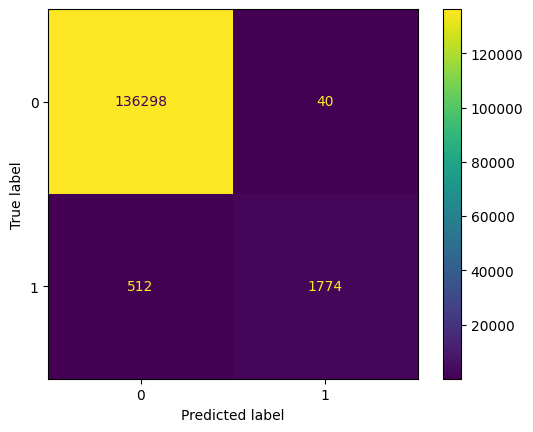

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(cm).plot()

Так, у нас получилось особенно малое количество False Positive по сравнению с моделью, написанной группой на семинаре (ниже).

Для сравнения : модель, обученная на семинаре:

Отчет:
```
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    137696
           1       0.71      0.72      0.72      2185

    accuracy                           0.99    139881
   macro avg       0.85      0.86      0.86    139881
weighted avg       0.99      0.99      0.99    139881
```

Confusion matrix:  

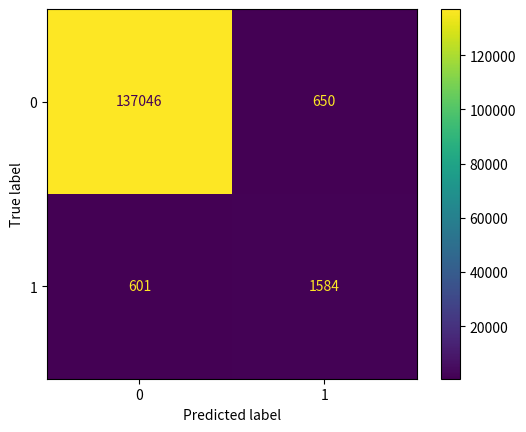

Так, мне удалось увеличить точность за счет лучшей предобработки данных.

### Задание №9: Используйте файл Fraud_test_data_#1.csv для оценки качества модели на тестовой выборке

In [ ]:
df_test = pd.read_excel(test_file_path)
df_test

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,city_state,is_fraud
0,2020-09-05 16:43:01,375248307838179,"fraud_Roberts, Daniel and Macejkovic",kids_pets,85.61,Joshua,Mendoza,M,4215 Miranda Field Suite 326,26237,38.86,-80.16,571,Accounting technician,1967-09-16,9e661bf1713514accb16c915e4480e10,1378399381,39.19,-81.14,Tallmansville_WV,0
1,2020-12-25 20:28:49,4764202053279782,"fraud_Crist, Jakubowski and Littel",home,31.76,Derek,Jones,M,198 Candace Plaza,44412,41.09,-81.04,2644,Air cabin crew,1981-01-06,bc543895e5ca80b2c093a8e2d5c56dc9,1388003329,41.55,-81.81,Diamond_OH,0
2,2020-10-13 05:48:42,3549202406645667,"fraud_Rippin, Kub and Mann",misc_net,6.59,Larry,Williams,M,6274 David Oval Suite 725,4074,43.58,-70.35,18760,Make,1933-04-02,a7f584f2d1d630c501045fb889931243,1381643322,44.25,-69.81,Scarborough_ME,0
3,2020-10-22 12:17:34,3577663406369449,"fraud_Graham, Hegmann and Hammes",food_dining,54.81,Cody,Hooper,M,7233 John Parks,72354,35.61,-90.34,2470,Counselling psychologist,1968-10-06,46ca845a31c33b05b08133ce5297320d,1382444254,35.87,-90.84,Lepanto_AR,0
4,2020-07-04 18:30:25,3513506355699497,fraud_Kozey-Kuhlman,personal_care,46.17,Sarah,Adams,F,5654 Peterson Land,39157,32.41,-90.12,24645,"Scientist, clinical (histocompatibility and im...",1966-05-29,d061aab95c5612385d0dd35c8b40c597,1372962625,32.77,-90.64,Ridgeland_MS,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154068,2020-12-22 22:05:48,2242176657877538,"fraud_Willms, Kris and Bergnaum",shopping_pos,"1,041.51",Travis,Daniel,M,1327 Rose Causeway Apt. 610,38668,34.63,-89.89,14462,Database administrator,1959-03-03,35b0297dd026d2e9a75d024a5dec7955,1387749948,34.57,-89.91,Senatobia_MS,1
154069,2020-12-22 22:18:07,2242176657877538,fraud_Kuhn LLC,shopping_pos,868.09,Travis,Daniel,M,1327 Rose Causeway Apt. 610,38668,34.63,-89.89,14462,Database administrator,1959-03-03,da7f67d7375f10a054a3d919448c45dd,1387750687,34.09,-90.39,Senatobia_MS,1
154070,2020-12-22 22:31:48,2242176657877538,"fraud_Mosciski, Ziemann and Farrell",shopping_net,"1,039.42",Travis,Daniel,M,1327 Rose Causeway Apt. 610,38668,34.63,-89.89,14462,Database administrator,1959-03-03,25b076c7bcd70f272c1c5326bb234f4b,1387751508,34.63,-90.28,Senatobia_MS,1
154071,2020-12-22 23:06:03,2242176657877538,fraud_Bauch-Raynor,grocery_pos,289.27,Travis,Daniel,M,1327 Rose Causeway Apt. 610,38668,34.63,-89.89,14462,Database administrator,1959-03-03,2df7d894868fbc99ec1d8b055585fc9d,1387753563,34.75,-90.40,Senatobia_MS,1


In [ ]:
def process_data(df):
  df = df.drop(['cc_num', 'street', 'trans_num', 'unix_time', 'first', 'last'], axis=1)
  df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')
  df = df.rename({'trans_date_trans_time' : 'dt'}, axis=1)
  df['merchant'] = df['merchant'].str.replace('fraud_', '')
  df['gender'] = np.where(df['gender'] == 'M', 1, 0)

  df['dob'] = pd.to_datetime(df['dob'], format='%Y-%m-%d')
  df['age'] = 2024 - df['dob'].dt.year
  df = df.drop('dob', axis=1)

  df[['city', 'state']] = df['city_state'].str.split('_', expand=True)
  df = df.drop('city_state', axis=1)
  df = df.drop(['merch_long', 'merch_lat', 'zip'], axis=1)

  df['job'] = df['job'].str.lower()\
    .str.replace(r'\([^)]*\)','', regex=True)\
    .str.replace('\'', '')\
    .str.replace('\"', '')\
    .str.replace(r',(.*)', '', regex=True)\
    .str.replace(r'\s+', ' ', regex=True)\
    .str.replace(r'^\s', '', regex=True)\
    .str.replace(r'\s$', '', regex=True)

  df.loc[df['job'].str.contains('/'), 'job'] = df.loc[df['job'].str.contains('/'), 'job'].str.match(r'/(.*)', '/1')

  for index, col in enumerate(['job', 'city', 'state', 'merchant']): #используем прежде 'натренированный' энкодер
    df[col] = encs[index].transform(df[col])

  for unique in df['category'].unique():
    df[unique] = (df['category'] == unique).astype('int')

  df = df.drop('category', axis=1)

  df['day_pct'] = (df['dt'].dt.hour + df['dt'].dt.minute / 60) / 24
  df['day_of_week'] = df['dt'].dt.dayofweek + 1
  df['year_pct'] = (df['dt'].dt.month + df['dt'].dt.day / 30) / 12
  df['month'] = df['dt'].dt.month
  df['day'] = df['dt'].dt.day
  df = df.drop('dt', axis=1)

  return df


df_test = process_data(df_test)
df_test = df_test[df.columns] #переставим колонки как в оригинальном датафрейме
                              #иначе не получится получить предсказания
df_test

,merchant,amt,gender,lat,long,city_pop,job,is_fraud,age,city,state,grocery_pos,kids_pets,gas_transport,entertainment,grocery_net,misc_net,food_dining,shopping_pos,shopping_net,misc_pos,home,health_fitness,personal_care,travel,day_pct,day_of_week,year_pct,month,day
0,0.01,85.61,1,38.86,-80.16,571,0.02,0,57,0.00,0.02,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.70,6,0.76,9,5
1,0.00,31.76,1,41.09,-81.04,2644,0.04,0,43,0.01,0.02,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.85,5,1.07,12,25
2,0.04,6.59,1,43.58,-70.35,18760,0.01,0,91,0.02,0.02,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.24,2,0.87,10,13
3,0.01,54.81,1,35.61,-90.34,2470,0.01,0,56,0.04,0.01,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.51,4,0.89,10,22
4,0.01,46.17,0,32.41,-90.12,24645,0.02,0,58,0.00,0.02,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.77,6,0.59,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154068,0.01,"1,041.51",1,34.63,-89.89,14462,0.01,1,65,0.02,0.02,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.92,2,1.06,12,22
154069,0.03,868.09,1,34.63,-89.89,14462,0.01,1,65,0.02,0.02,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.93,2,1.06,12,22
154070,0.05,"1,039.42",1,34.63,-89.89,14462,0.01,1,65,0.02,0.02,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.94,2,1.06,12,22
154071,0.03,289.27,1,34.63,-89.89,14462,0.01,1,65,0.02,0.02,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.96,2,1.06,12,22


In [ ]:
y_pred_test = rf2.predict(df_test.drop('is_fraud', axis=1))

print(classification_report(df_test['is_fraud'], y_pred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    151928
           1       0.96      0.44      0.60      2145

    accuracy                           0.99    154073
   macro avg       0.98      0.72      0.80    154073
weighted avg       0.99      0.99      0.99    154073



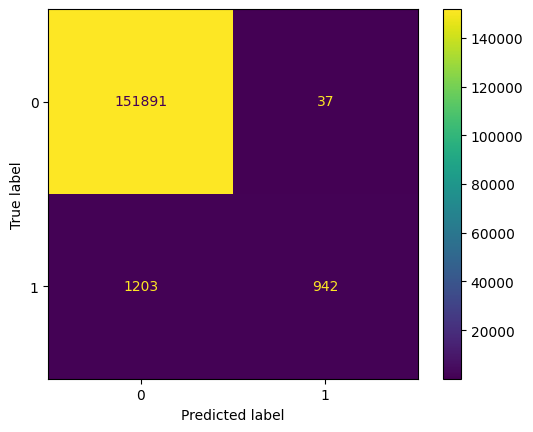

In [ ]:
cm = confusion_matrix(df_test['is_fraud'], y_pred_test)
ConfusionMatrixDisplay(cm).plot()

Качество модели на новой тестовом файле упало, что можно обьяснить только другой структурой данных по сравнению с оригинальными файлами.